In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [3]:
df = pd. read_csv("out/precision-loo/e-loocv_ecfp4_precision.csv")
df = df[df["Score"] > 0]
df

,Score,Precision
230850,0.000033,0.041872
230851,0.000033,0.041873
230852,0.000033,0.041874
230853,0.000033,0.041875
230854,0.000033,0.041876
...,...,...
273236,1.004626,1.000000
273237,1.004651,1.000000
273238,1.004783,1.000000
273239,1.005242,1.000000


Parámetros ajustados: a = 0.6075897151090609, b = 0.07249475345660913


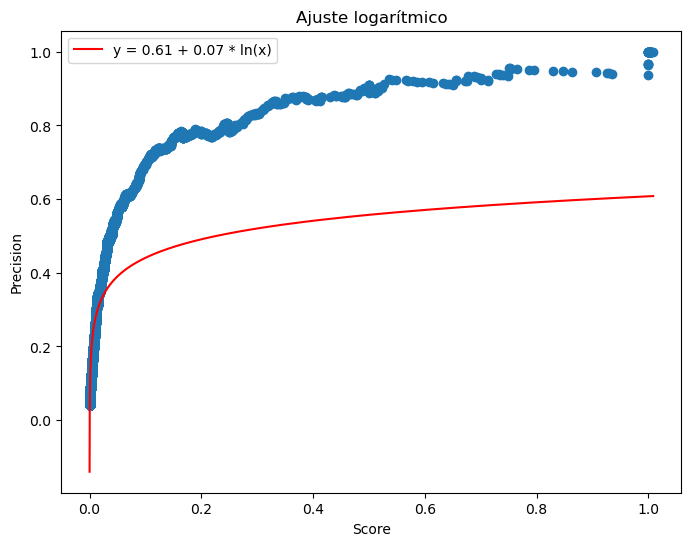

In [9]:
df = pd. read_csv("out/precision-loo/e-loocv_ecfp4_precision.csv")
df = df[df["Score"] > 0]

def log_model(x, a, b):
    return a + b * np.log(x)

x = df['Score']
y = df['Precision']
params, covariance = curve_fit(log_model, x, y)

a, b = params
print(f"Parámetros ajustados: a = {a}, b = {b}")

# Calcular valores predichos
df['Predicted'] = log_model(x, a, b)

# Graficar los datos y el ajuste
plt.figure(figsize=(8, 6))
plt.scatter(x, y)
plt.plot(x, df['Predicted'], label=f"y = {a:.2f} + {b:.2f} * ln(x)", color="red")
plt.xlabel("Score")
plt.ylabel("Precision")
plt.legend()
plt.title("Ajuste logarítmico")
plt.show()
